In [3]:
import pandas as pd
train = pd.read_csv("train.csv")
#print(train.head())
test = pd.read_csv("test.csv", index_col=[0])
#print(test.head())

In [5]:
y_train_pre = train['Label']
X_train_pre = train.drop(['Label', 'X6', 'X3','X15','X9','X26','X12','X18','Time','X24','X13'], axis=1) 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X_train_pre, y_train_pre, test_size = 0.1, 
                                                      stratify=y_train_pre, random_state=0)

[0]	validation_0-auc:0.96805	validation_1-auc:0.96210
[1]	validation_0-auc:0.97010	validation_1-auc:0.96416
[2]	validation_0-auc:0.99083	validation_1-auc:0.94096
[3]	validation_0-auc:0.99199	validation_1-auc:0.96246
[4]	validation_0-auc:0.99339	validation_1-auc:0.96346
[5]	validation_0-auc:0.99395	validation_1-auc:0.96303
[6]	validation_0-auc:0.99501	validation_1-auc:0.96240
[7]	validation_0-auc:0.99481	validation_1-auc:0.96056
[8]	validation_0-auc:0.99455	validation_1-auc:0.97176
[9]	validation_0-auc:0.99457	validation_1-auc:0.97095
[10]	validation_0-auc:0.99581	validation_1-auc:0.96995
[11]	validation_0-auc:0.99585	validation_1-auc:0.97424


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[12]	validation_0-auc:0.99582	validation_1-auc:0.97362
[13]	validation_0-auc:0.99577	validation_1-auc:0.97314
[14]	validation_0-auc:0.99574	validation_1-auc:0.97290
[15]	validation_0-auc:0.99562	validation_1-auc:0.97121
[16]	validation_0-auc:0.99549	validation_1-auc:0.97223
[17]	validation_0-auc:0.99538	validation_1-auc:0.96986
[18]	validation_0-auc:0.99534	validation_1-auc:0.96973
[19]	validation_0-auc:0.99525	validation_1-auc:0.96815
[20]	validation_0-auc:0.99515	validation_1-auc:0.97373
[21]	validation_0-auc:0.99535	validation_1-auc:0.97585
[22]	validation_0-auc:0.99561	validation_1-auc:0.97466
[23]	validation_0-auc:0.99555	validation_1-auc:0.97485
[24]	validation_0-auc:0.99631	validation_1-auc:0.98613
[25]	validation_0-auc:0.99628	validation_1-auc:0.98647
[26]	validation_0-auc:0.99627	validation_1-auc:0.98589
[27]	validation_0-auc:0.99925	validation_1-auc:0.98561
[28]	validation_0-auc:0.99925	validation_1-auc:0.98487
[29]	validation_0-auc:0.99928	validation_1-auc:0.98560
[30]	valid

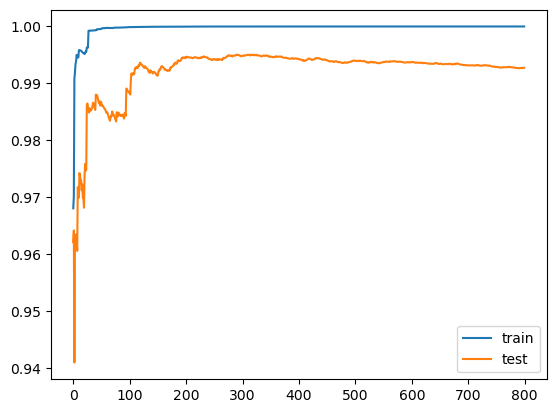

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from xgboost import XGBClassifier
import numpy as np

model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1) ), 
                    objective= 'binary:logistic', 
                    n_estimators = 800, 
                    learning_rate = 0.03, 
                    max_depth = 8, 
                    subsample = 0.6, #0.8, 0.7 # 0.7,0.8
                    colsample_bytree = 0.7, #0.5, 0.6 #0.8
                    gamma = 0, 
                    min_child_weight = 1, 
                    reg_alpha = 0.9, 
                    reg_lambda = 0.8, 
                    max_delta_step = 2, 
                    use_label_encoder=False, random_state = 10, eval_metric = "auc")
evalset = [(X_train, y_train), (X_valid,y_valid)]
# fit the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])
# evaluate performance
yhat = model.predict(X_valid)
score = accuracy_score(y_valid, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

In [17]:
#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #learning_rate = 0.01, 
                      #n_estimators = 2100,
                      #max_depth = 18,
                      #subsample= 0.7,
                      #colsample_bytree = 0.5,
                      #gamma = 1,
                      #min_child_weight = 1,
                      #reg_lambda=0.2,
                      #reg_alpha = 0,
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #learning_rate = 0.01, 
                      #n_estimators = 3500,
                      #max_depth = 20,
                      #subsample= 0.6,
                      #colsample_bytree = 0.4,
                      #gamma = 1,
                      #min_child_weight = 1,
                      #reg_lambda=0.2,
                      #reg_alpha = 0,
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")


#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #learning_rate = 0.02, 
                      #n_estimators = 600,
                      #max_depth = 20,
                      #subsample= 0.6,
                      #colsample_bytree = 0.4,
                      #gamma = 1,
                      #min_child_weight = 1,
                      #reg_lambda=0.2,
                      #reg_alpha = 0,
                      #max_leaves = 100,
                      #colsample_bynode = 0.9,
                      #max_delta_step =0,
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #learning_rate = 0.02, 
                      #n_estimators = 1200,
                      #max_depth = 17,
                      #subsample= 0.7,
                      #colsample_bytree = 0.4,
                      #gamma = 1,
                      #min_child_weight = 5,
                      #reg_lambda=1,
                      #reg_alpha = 0,
                      #max_leaves = 100,
                      #colsample_bynode = 1,
                      #max_delta_step =0.1,
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #learning_rate = 0.01, 
                      #n_estimators = 3400,
                      #max_depth = 17,
                      #subsample= 0.7,
                      #colsample_bytree = 0.6,
                      #gamma = 0,
                      #min_child_weight = 1,
                      #reg_lambda=3,
                      #reg_alpha = 0.2,
                      #max_leaves = 0,
                      #colsample_bynode = 1,
                      #max_delta_step =0,
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #learning_rate = 0.03, 
                      #n_estimators = 900,
                      #max_depth = 6,
                      #subsample= 0.8,
                      #colsample_bytree = 0.7,
                      #gamma = 0.9,
                      #min_child_weight = 8,
                      #reg_lambda=3,
                      #reg_alpha = 0.2,
                      #max_leaves = 100,
                      #colsample_bynode = 0.6,
                      #max_delta_step =2,
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #gamma = 2, learning_rate = 0.03, max_depth =6, n_estimators = 900, subsample = 0.4, 
                      #min_child_weight = 2, reg_lambda = 1, reg_alpha = 0.1, colsample_bytree = 0.6, max_delta_step = 3, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "auc")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #gamma = 1, learning_rate = 0.01, max_depth =13, n_estimators = 1900, subsample = 0.8, 
                      #min_child_weight = 4, reg_lambda = 4, reg_alpha = 2, colsample_bytree = 0.7, max_delta_step = 2, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #gamma = 2, learning_rate = 0.001, max_depth =18, n_estimators = 4000, subsample = 0.8, 
                      #min_child_weight = 6, reg_lambda = 4, reg_alpha = 2, colsample_bytree = 0.7, max_delta_step = 2, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = 50, objective= 'binary:logistic',  
                      #gamma = 2, learning_rate = 0.001, max_depth =12, n_estimators = 3000, subsample = 0.8, 
                      #min_child_weight = 4, reg_lambda =3, reg_alpha = 3, colsample_bytree = 0.6, max_delta_step = 2, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")


#model = XGBClassifier(scale_pos_weight = 50, objective= 'binary:logistic',  
                    #gamma = 0.2, learning_rate = 0.03, max_depth =8, n_estimators = 600, subsample = 0.8, 
                      #min_child_weight = 2, reg_lambda =0.7, reg_alpha = 0.2, colsample_bytree = 0.7, max_delta_step = 1, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = 100, objective= 'binary:logistic',  
                      #gamma = 2, learning_rate = 0.03, max_depth =6, n_estimators = 700, subsample = 0.7, 
                      #min_child_weight = 2, reg_lambda =0.8, reg_alpha = 1, colsample_bytree = 0.8, max_delta_step = 1, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1) ), 
                    #objective= 'binary:logistic', 
                    #n_estimators = 800, 
                    #learning_rate = 0.03, 
                    #max_depth = 8, 
                    #subsample = 0.6, #0.8, 0.7 # 0.7,0.8
                    #colsample_bytree = 0.8, #0.5, 0.6 #0.8
                    #gamma = 1, 
                    ##reg_alpha = 1, 
                    #reg_lambda = 0.8, 
                    #max_delta_step = 1, 
                    #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #gamma = 1, learning_rate = 0.03, max_depth =8, n_estimators = 800, subsample = 0.8, 
                      #min_child_weight = 2, reg_lambda =1, reg_alpha = 1, colsample_bytree = 0.8, max_delta_step = 1, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1)), objective= 'binary:logistic',  
                      #gamma = 0, learning_rate = 0.03, max_depth =8, n_estimators = 800, subsample = 0.8, 
                      #min_child_weight = 1, reg_lambda = 0.8, reg_alpha = 1, colsample_bytree = 0.8, max_delta_step = 1, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = 100, objective= 'binary:logistic',  
                      #gamma = 0.2, learning_rate = 0.03, max_depth =6, n_estimators = 700, subsample = 0.7, 
                      #min_child_weight = 1, reg_lambda =0.8, reg_alpha = 1, colsample_bytree = 0.8, max_delta_step = 1, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = 100, objective= 'binary:logistic',  
                      #gamma = 0.2, learning_rate = 0.03, max_depth =6, n_estimators = 700, subsample = 0.7, 
                      #min_child_weight = 1, reg_lambda =0.8, reg_alpha = 1, colsample_bytree = 0.8, max_delta_step = 1, 
                       #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1) ), 
                    #objective= 'binary:logistic', 
                    #n_estimators = 800, 
                    #learning_rate = 0.03, 
                    #max_depth = 8, 
                    #subsample = 0.6, #0.8, 0.7 # 0.7,0.8
                    #colsample_bytree = 0.7, #0.5, 0.6 #0.8
                    #gamma = 0, 
                    #min_child_weight = 1, 
                    #reg_alpha = 0.9, 
                    #reg_lambda = 1, 
                    #max_delta_step = 2, 
                    #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1) ), 
                    #objective= 'binary:logistic', 
                    #n_estimators = 800, 
                    #learning_rate = 0.03, 
                    #max_depth = 8, 
                    #subsample = 0.4, #0.8, 0.7 # 0.7,0.8
                    #colsample_bytree = 0.7, #0.5, 0.6 #0.8
                    #gamma = 0, 
                    #min_child_weight = 1, 
                    #reg_alpha = 0.9, 
                    #reg_lambda = 1, 
                    #max_delta_step = 3, 
                    #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

#model = XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1) ), 
                    #objective= 'binary:logistic', 
                    #n_estimators = 800, 
                    #learning_rate = 0.03, 
                    #max_depth = 8, 
                    #subsample = 0.6, #0.8, 0.7 # 0.7,0.8
                    #colsample_bytree = 0.7, #0.5, 0.6 #0.8
                    #gamma = 0, 
                    #min_child_weight = 1, 
                    #reg_alpha = 2, 
                    #reg_lambda = 0.8, 
                    #max_delta_step = 2, 
                    #use_label_encoder=False, random_state = 10, eval_metric = "aucpr")

XGBClassifier(scale_pos_weight = np.sqrt(np.sum(y_train == 0)/ np.sum(y_train == 1) ), 
                    objective= 'binary:logistic', 
                    n_estimators = 800, 
                    learning_rate = 0.03, 
                    max_depth = 8, 
                    subsample = 0.6, #0.8, 0.7 # 0.7,0.8
                    colsample_bytree = 0.7, #0.5, 0.6 #0.8
                    gamma = 0, 
                    min_child_weight = 1, 
                    reg_alpha = 0.9, 
                    reg_lambda = 0.8, 
                    max_delta_step = 2, 
                    use_label_encoder=False, random_state = 10, eval_metric = "aucpr")
                      
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:43:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, random_state=10, ...)

In [19]:
pred_valid = model.predict_proba(X_valid)[:, 1] #model.predict(X_valid) ## prediction on the training dataset
pred_valid
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_valid, pred_valid, max_fpr=0.01))
from sklearn.metrics import classification_report
pred_valid_binary = (pred_valid >= 0.5).astype(int)
print(classification_report(y_valid, pred_valid_binary))

0.9445446157257162
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.96      0.83      0.89        30

    accuracy                           1.00     17089
   macro avg       0.98      0.92      0.95     17089
weighted avg       1.00      1.00      1.00     17089



In [21]:
0.825501916146376 +0.043589952698251534

0.8690918688446275

In [23]:
0.8252958418921338 +0.04648692693568935

0.8717827688278231

In [25]:
0.8225804205026167 +0.04436293905642672

0.8669433595590434

In [27]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report
precision, recall, thresholds = precision_recall_curve(y_valid, pred_valid)
fscore = (2 * precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(fscore)]
print(f"Best threshold: {best_threshold}")

# https://www.geeksforgeeks.org/how-to-use-scikit-learns-tunedthresholdclassifiercv-for-threshold-optimization/

Best threshold: 0.8510838747024536


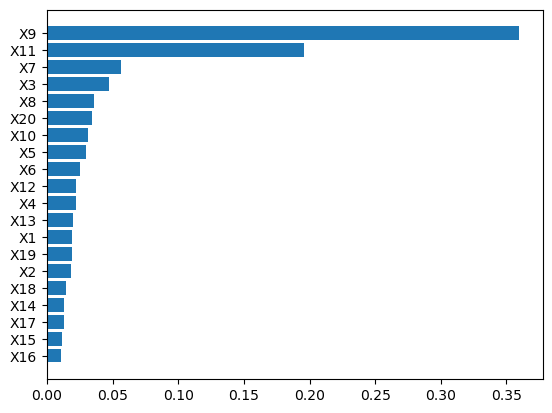

Index(['X16', 'X15', 'X17', 'X14', 'X18', 'X2', 'X19', 'X1', 'X13', 'X4',
       'X12', 'X6', 'X5', 'X10', 'X20', 'X8', 'X3', 'X7', 'X11', 'X9'],
      dtype='object')

In [29]:
sorted_index = model.feature_importances_.argsort()
import matplotlib.pyplot as plt
plt.barh(train.columns[sorted_index],model.feature_importances_[sorted_index])
plt.show()
train.columns[sorted_index]

In [31]:
pred_train = model.predict_proba(X_train)[:, 1] ## prediction on the training dataset
pred_train

array([1.8671128e-05, 1.8319870e-05, 5.2621956e-05, ..., 5.9587031e-04,
       5.2731730e-06, 5.9842943e-05], dtype=float32)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, pred_train, max_fpr=0.01)

1.0

In [35]:
roc_auc_score(y_valid, pred_valid, max_fpr=0.01)

0.9445446157257162

In [37]:
from sklearn.metrics import classification_report
pred_valid_binary = (pred_valid > 0.5).astype(int)
print(classification_report(y_valid, pred_valid_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17059
           1       0.96      0.83      0.89        30

    accuracy                           1.00     17089
   macro avg       0.98      0.92      0.95     17089
weighted avg       1.00      1.00      1.00     17089



In [39]:
test_2 = test.drop(columns = ['X6', 'X3','X15','X9','X26','Time','X12','X18', 'X13','X24'])
pred_test = model.predict_proba(test_2.to_numpy())[:, 1]
print(pred_test)
pred_test_val = (pred_test >= 0.5).astype(int)
print(np.sum(pred_test_val==1))

[1.2409211e-05 3.7965144e-06 4.5081597e-05 ... 8.4981184e-06 4.0384703e-06
 1.1005860e-04]
177


In [53]:
pred_train_pre = model.predict_proba(X_train_pre)[:, 1] ## prediction on the training dataset
pred_train_pre

array([1.3974642e-05, 1.2700770e-05, 2.0479434e-04, ..., 6.4653186e-06,
       4.8415586e-05, 1.2862853e-05], dtype=float32)

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_pre, pred_train_pre, max_fpr=0.01)

0.9944181276040616

In [41]:
submission = pd.DataFrame({'id':test_2.index, 'Label':pred_test})
submission
submission.set_index('id').to_csv("submission.csv")
!head -5 submission.csv

id,Label
0,1.2409211e-05
1,3.7965144e-06
2,4.5081597e-05
3,2.8427603e-05


In [65]:
train_result = pd.DataFrame({'id':train.index,'Label':pred_train_pre})
train_result
train_result.set_index('id').to_csv("train_result.csv")
!head -5 train_result.csv

id,Label
0,1.3974642e-05
1,1.270077e-05
2,0.00020479434
3,1.4926733e-05
